In [1]:
import numpy as np
from svgpathtools import svg2paths, wsvg
from draw import draw_strokes
import re
from utils import normalize
import glob
import os
from collections import defaultdict
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from bezier2lineseg import bazier2line, simplify

# Read line segemented svg files 

In [2]:
line_svgs = sorted(glob.glob("./Output/svg_line/*.svg"), key=lambda x: int(os.path.basename(x).split("_")[0]))
print(len(line_svgs))

2002


# Convert Absolute coordinates to Relative coordinates
### following works
> 1. count num of line segments for each svg file
> 2. count num of __move__ s for each svg file
> 3. count num of __line__ s for each svg file  
> 4. Normalize the results

In [3]:
svg_npy = defaultdict(dict)

for line_svg in line_svgs:
    print(line_svg)
    paths, attributes = svg2paths(line_svg)

    p = re.compile(r"[ML]+ \d*[.]*\d*,\d*[.]*\d*")

    abs_dset = []
    for att in attributes:
        attr = att['d']
        pen_movements = p.findall(attr)
        for pen_move in pen_movements:
            pen_s = pen_move.split(" ")[0]
            if pen_s == "M": 
                pen_state = 1.
            elif pen_s == "L": 
                pen_state = 0.
            else: raise RuntimeError(f"pen_s: {pen_s}")
            abs_x, abs_y = map(float, pen_move.split(" ")[1].split(","))
            abs_dset.append(np.array((abs_x, abs_y, pen_state)))

    dset = []
    dset.append(abs_dset[0])
    for i in range(1, len(abs_dset)):
        delta_x = abs_dset[i][0] - abs_dset[i-1][0]
        delta_y = abs_dset[i][1] - abs_dset[i-1][1]
        pen_state = abs_dset[i][2]
        
        dset.append((delta_x, delta_y, pen_state))

    draw = normalize(np.stack([np.array(dset)]))
    
    prev_segnum = -1
    while True:
        draw = simplify(draw, delta=0.1)
        if prev_segnum == len(draw[0]):
            break
        prev_segnum = len(draw[0])
        
    m_cnt = 0
    l_cnt = 0
    for stroke in draw[0]:
        if stroke[2] < 0.1:
            l_cnt += 1
        elif stroke[2] > 0.9:
            m_cnt +=1 
        else:
            raise RuntimeError(f"? : {stroke}") 
    
    name = os.path.basename(line_svg)
    # draw_strokes(np.array(draw[0]), factor=0.002, svg_filename=f"./Output/Portrait/rough/svg_simple/{name}", draw=False)
    
    svg_npy[name]["strokes"] = draw
    svg_npy[name]["num_seg"] = len(draw[0])
    svg_npy[name]["m_cnt"] = m_cnt
    svg_npy[name]["l_cnt"] = l_cnt
    
np.save("rough_eyes2.npy", np.array(list(svg_npy.items())), allow_pickle=True)

./Output/svg_line/1_F_5_eyes.svg
./Output/svg_line/1_F_0_eyes.svg
./Output/svg_line/1_T_-15_eyes.svg
./Output/svg_line/1_F_-20_eyes.svg
./Output/svg_line/1_T_30_eyes.svg
./Output/svg_line/1_T_15_eyes.svg
./Output/svg_line/1_T_10_eyes.svg
./Output/svg_line/1_F_-5_eyes.svg
./Output/svg_line/1_T_25_eyes.svg
./Output/svg_line/1_F_-15_eyes.svg
./Output/svg_line/1_T_-5_eyes.svg
./Output/svg_line/1_F_25_eyes.svg
./Output/svg_line/1_F_-30_eyes.svg
./Output/svg_line/1_F_10_eyes.svg
./Output/svg_line/1_F_30_eyes.svg
./Output/svg_line/1_T_-30_eyes.svg
./Output/svg_line/1_F_15_eyes.svg
./Output/svg_line/1_T_-20_eyes.svg
./Output/svg_line/1_F_20_eyes.svg
./Output/svg_line/1_T_20_eyes.svg
./Output/svg_line/1_T_-25_eyes.svg
./Output/svg_line/1_T_5_eyes.svg
./Output/svg_line/1_F_-10_eyes.svg
./Output/svg_line/1_T_0_eyes.svg
./Output/svg_line/1_T_-10_eyes.svg
./Output/svg_line/1_F_-25_eyes.svg
./Output/svg_line/2_F_-5_eyes.svg
./Output/svg_line/2_T_10_eyes.svg
./Output/svg_line/2_T_-20_eyes.svg
./Outpu

/home/joono/media/MinLab/PNG-to-SVG/bezier2lineseg.py:23: RuntimeWarning: invalid value encountered in double_scalars
  if np.sqrt((s1[0]/s1_norm - s2[0]/s2_norm)**2 + (s1[1]/s1_norm - s2[1]/s2_norm)**2) < delta: # if two strokes are small enough to remove,


./Output/svg_line/3_F_-25_eyes.svg
./Output/svg_line/3_T_30_eyes.svg
./Output/svg_line/3_F_-15_eyes.svg
./Output/svg_line/3_T_25_eyes.svg
./Output/svg_line/3_F_-5_eyes.svg
./Output/svg_line/3_F_15_eyes.svg
./Output/svg_line/3_T_-10_eyes.svg
./Output/svg_line/3_T_15_eyes.svg
./Output/svg_line/3_T_-15_eyes.svg
./Output/svg_line/3_T_0_eyes.svg
./Output/svg_line/3_T_-25_eyes.svg
./Output/svg_line/3_T_5_eyes.svg
./Output/svg_line/3_T_20_eyes.svg
./Output/svg_line/3_T_10_eyes.svg
./Output/svg_line/4_F_0_eyes.svg
./Output/svg_line/4_F_-5_eyes.svg
./Output/svg_line/4_T_-25_eyes.svg
./Output/svg_line/4_F_-25_eyes.svg
./Output/svg_line/4_F_-10_eyes.svg
./Output/svg_line/4_T_-15_eyes.svg
./Output/svg_line/4_T_0_eyes.svg
./Output/svg_line/4_T_30_eyes.svg
./Output/svg_line/4_T_10_eyes.svg
./Output/svg_line/4_F_-30_eyes.svg
./Output/svg_line/4_T_20_eyes.svg
./Output/svg_line/4_T_-20_eyes.svg
./Output/svg_line/4_F_25_eyes.svg
./Output/svg_line/4_T_-10_eyes.svg
./Output/svg_line/4_F_-15_eyes.svg
./Out

# num of segments 

<AxesSubplot:>

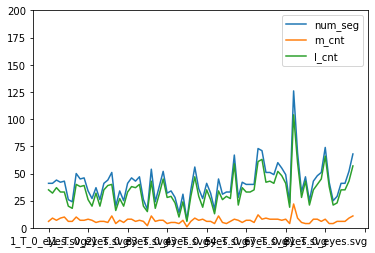

In [8]:
df = pd.DataFrame(svg_npy).transpose()
df.plot(ylim=(0, 200))

In [5]:
df.agg(
    {
        "num_seg": ["min", "max", "median", "mean"],
        "m_cnt": ["min", "max", "median", "mean"],
        "l_cnt": ["min", "max", "median", "mean"],
    }
   )

,num_seg,m_cnt,l_cnt
min,7.000000,1.000000,6.000000
max,126.000000,22.000000,104.000000
median,41.000000,7.000000,33.500000
mean,41.205128,6.897436,34.307692


# 시간에 따른 3D plot

/tmp/ipykernel_4061355/1927412042.py:22: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


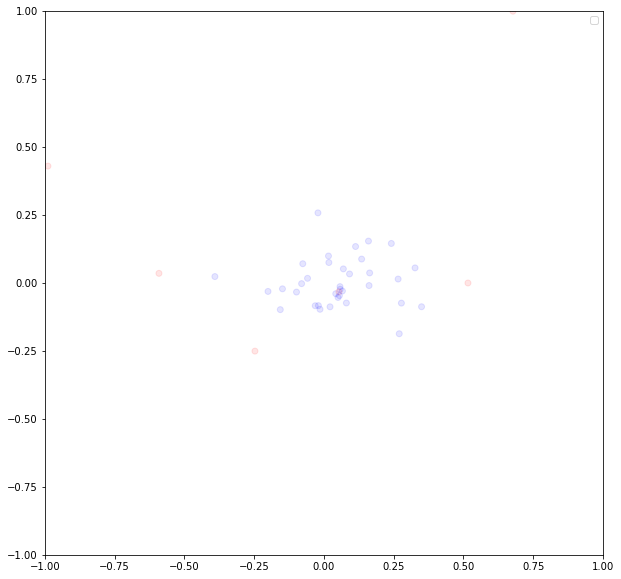

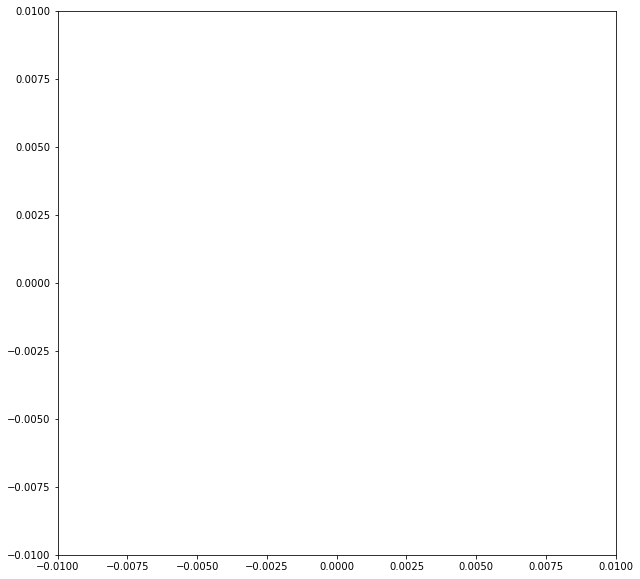

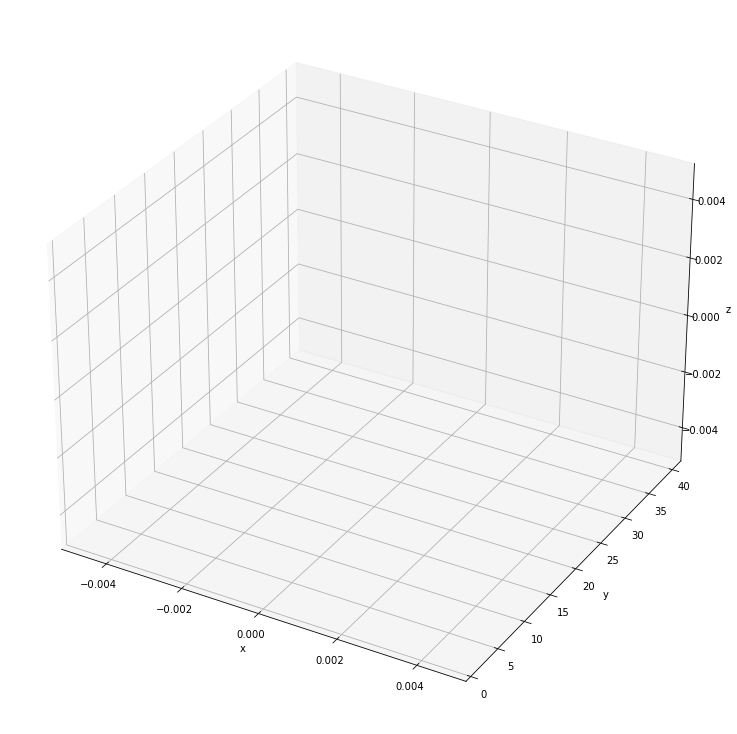

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

draw = svg_npy["1_T_0_eyes.svg"]["strokes"]

colors = ["red" if p > 0.9 else "blue" for p in draw[0][:, 2]]
plt.figure(1, figsize=(10, 10))
plt.legend(["MoveTo", "LineTo"])
plt.xlim((-1., 1.))
plt.ylim((-1., 1.))
plt.scatter(draw[0][:, 0], draw[0][:, 1], c=colors, alpha=0.1)

plt.figure(2, figsize=(10, 10))
plt.xlim((-.01, .01))
plt.ylim((-.01, .01))
plt.scatter(draw[0][:, 0], draw[0][:, 1], c=colors, alpha=0.1)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim((-.005, .005))
ax.set_zlim((-.005, .005))
ax.set_ylim((0, len(draw[0])))

# ax.plot_trisurf(draw[0][:, 0], draw[0][:, 1], np.linspace(0., 1., len(draw[0])), linewidth=0.2)

ax.scatter(draw[0][:, 0], np.arange(0, len(draw[0])), draw[0][:, 1], c=colors)
plt.show()



# 3D Plot gif 형식으로 저장

In [8]:
from matplotlib import animation 

def init():
    ax.scatter(draw[0][:, 0], np.arange(0, len(draw[0])), draw[0][:, 1], c=colors)
    
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('mpl3d_scatter.gif', fps=30)

# Distribution of whole offsets

In [10]:
# for v in svg_npy.values():
#     print(v["strokes"][0].shape)

whole_strokes = np.concatenate([v["strokes"][0] for v in svg_npy.values()], axis=0)
whole_strokes.shape

KeyError: 'strokes'

In [ ]:
colors = ["red" if p > 0.9 else "blue" for p in whole_strokes[:, 2]]
plt.figure(1, figsize=(10, 10))
plt.legend(["MoveTo", "LineTo"])
plt.xlim((-1., 1.))
plt.ylim((-1., 1.))
plt.scatter(whole_strokes[:, 0], whole_strokes[:, 1], c=colors, alpha=0.01)

plt.figure(2, figsize=(10, 10))
plt.xlim((-.1, .1))
plt.ylim((-.1, .1))
plt.scatter(whole_strokes[:, 0], whole_strokes[:, 1], c=colors, alpha=0.01)

# Try 2

- Bèzier2lineseg N=`num_seg`

M :1877, L: 7770, Total: 9647


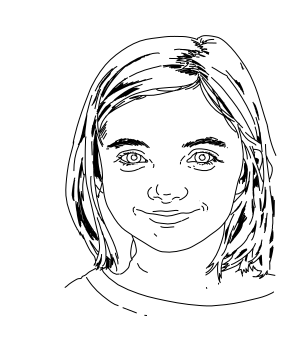

In [60]:
num_seg = 3

line_svg = bazier2line("./Output/Portrait/rough/svg/1.svg", num_of_segments=num_seg)
wsvg(line_svg, filename="tmp.svg")
paths, attributes = svg2paths("tmp.svg")

p = re.compile(r"[ML]+ \d*[.]*\d*,\d*[.]*\d*")

abs_dset = []
m_count = 0
l_count = 0
for att in attributes:
    attr = att['d']
    pen_movements = p.findall(attr)
    for pen_move in pen_movements:
        pen_s = pen_move.split(" ")[0]
        if pen_s == "M": 
            pen_state = 1.
            m_count += 1
        elif pen_s == "L": 
            pen_state = 0.
            l_count += 1
        else: raise RuntimeError(f"pen_s: {pen_s}")
        abs_x, abs_y = map(float, pen_move.split(" ")[1].split(","))
        abs_dset.append(np.array((abs_x, abs_y, pen_state)))

dset = []
dset.append(abs_dset[0])
for i in range(1, len(abs_dset)):
    delta_x = abs_dset[i][0] - abs_dset[i-1][0]
    delta_y = abs_dset[i][1] - abs_dset[i-1][1]
    pen_state = abs_dset[i][2]
    
    dset.append((delta_x, delta_y, pen_state))

draw = normalize(np.stack([np.array(dset)]))
draw_strokes(draw[0], factor=0.005, svg_filename=f"tmp.svg")

In [61]:
draw[0].shape

(9647, 3)

In [5]:
def simplify(draw, delta=0.1, eps=1e-8):
    new_draw = []

    i = 0
    while i < (len(draw[0]) - 1):
        s1, s2 = draw[0][i], draw[0][i+1]
        
        s1_norm = np.sqrt(s1[0]**2 + s1[1]**2)    
        if s1_norm < eps:
            i += 1
            continue
        
        s2_norm = np.sqrt(s2[0]**2 + s2[1]**2)
        if np.sqrt((s1[0]/s1_norm - s2[0]/s2_norm)**2 + (s1[1]/s1_norm - s2[1]/s2_norm)**2) < delta: # if two strokes are small enough to remove,
            s1 = s1 + s2
            i += 1
        
        new_draw.append(s1)
        i += 1
    new_draw.append(draw[0][-1])
    len(new_draw)

    return np.stack([new_draw])

M :1874, L: 4212, Total: 6086


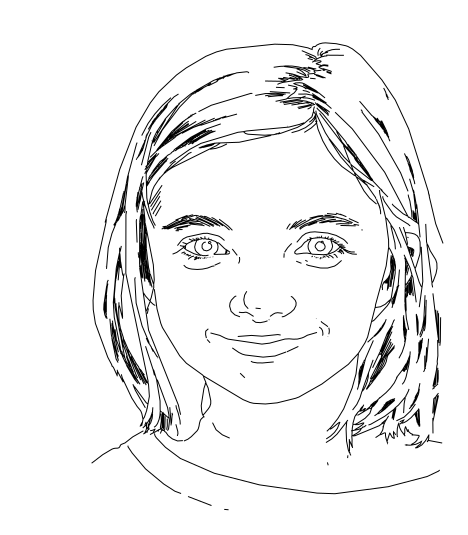

In [68]:
draw = simplify(draw, delta=0.1)
draw_strokes(draw[0], factor=0.003, svg_filename="tmp.svg")

In [12]:
import re

In [13]:
list(map(int, re.findall(r"\d+", "32_eyes.png")))[0]

['32']